# 共変量シフト 実験
* 共変量シフトについて  
  参考論文：http://www.ms.k.u-tokyo.ac.jp/2014/NonstationarityReview-jp.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

下記パラメータの値を変更して実行すると、色々な実験が可能

In [2]:
y_true = lambda x: x**2 / 10 - 20 # 真の回帰式
x_tra_mean = 0  # トレーニングデータの入力値分布の平均値
x_tes_mean = 4  # テストデータの入力値分布の平均値
train_data_num = 1000
test_data_num = 200
lambda_ = 1  # 重要度係数 1:シフトさせる～0:シフトさせない

ランダムデータ生成用関数

In [3]:
y_randn = lambda x: y_true(x) + np.random.randn(x.shape[0]) / 5

確率密度から重要度を算出する関数

In [4]:
def weight(x, train_mean, test_mean, lambda_=1):
    # ダイレクトに確率密度を取り出す
    train = stats.norm.pdf(x=x, loc=train_mean)
    test = stats.norm.pdf(x=x, loc=test_mean)
    return (test/train) ** lambda_

訓練用データ作成  
正規分布からランダムに生成後、平均値を変更

In [5]:
x_tra = np.random.randn(train_data_num) + x_tra_mean
y_tra = y_randn(x_tra)

テスト用データ  
正規分布からランダムに生成後、平均値を変更

In [6]:
x_tes = np.random.randn(test_data_num) + x_tes_mean
y_tes = y_randn(x_tes)

重要度重み付け

In [7]:
w = weight(x_tra, x_tra_mean, x_tes_mean, lambda_=lambda_)

共変量シフト対応ありの回帰

In [8]:
reg_ari = linear_model.LinearRegression()
_ = reg_ari.fit(x_tra.reshape(-1, 1), y_tra, sample_weight=w)

共変量シフト対応なしの回帰

In [9]:
reg_nasi = linear_model.LinearRegression()
_ = reg_nasi.fit(x_tra.reshape(-1, 1), y_tra)

結果出力

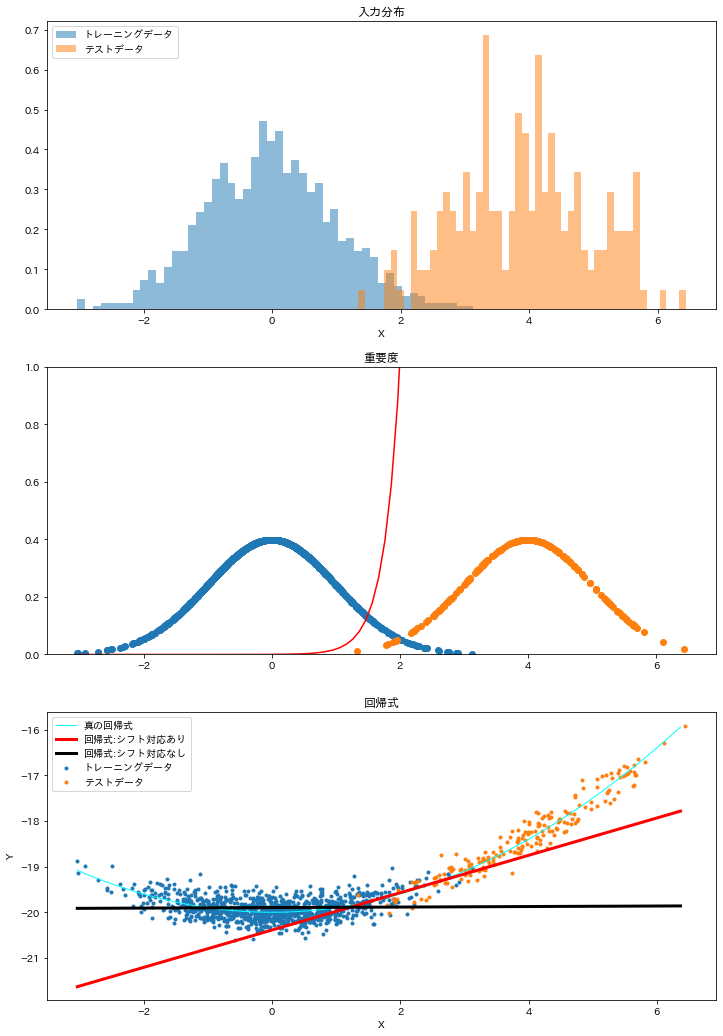

In [10]:
x = np.arange(x_tra.min(), x_tes.max(), 0.1)
y = y_true(x)

fig = plt.figure(figsize=(12,18))
ax1 = fig.add_subplot(311)
plt.title('入力分布')
ax1.hist(x_tra, bins=50, normed=True, alpha=0.5, label='トレーニングデータ')
ax1.hist(x_tes, bins=50, normed=True, alpha=0.5, label='テストデータ')
ax1.legend(loc='upper left')
plt.xlabel('X')
ax2 = fig.add_subplot(312)
plt.title('重要度')
ax2.scatter(x_tra, stats.norm.pdf(x=x_tra ,loc=x_tra_mean))
ax2.scatter(x_tes, stats.norm.pdf(x=x_tes ,loc=x_tes_mean))
ax2.plot(x, weight(x, x_tra_mean, x_tes_mean, lambda_=lambda_), c='red')
ax2.set_ylim(0, 1)
ax3 = fig.add_subplot(313)
plt.title('回帰式')
ax3.scatter(x_tra, y_tra, marker='.', label='トレーニングデータ')
ax3.scatter(x_tes, y_tes, marker='.', label='テストデータ')
ax3.plot(x, y, c='cyan', linewidth=1, label='真の回帰式')
ax3.plot(x, reg_ari.predict(np.array(x).reshape(-1,1)), c='red', linewidth=3, label='回帰式:シフト対応あり')
ax3.plot(x, reg_nasi.predict(np.array(x).reshape(-1,1)), c='black', linewidth=3, label='回帰式:シフト対応なし')
ax3.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()